# Análise Exploratória dos Dados

Primeiro, importaremos os dados usados.

In [1]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
print("Dados lidos!")

Dados lidos!


# 1) Média da metragem para cada um dos bairros

In [2]:
df.groupby("Bairro")[["Metragem"]].mean()

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


# 2) Duas formas de selecionar os dados por bairro

In [54]:
nome_do_bairro = "Planalto Paulista"

In [55]:
df[df["Bairro"] == nome_do_bairro]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,2190000.0
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,1390000.0
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,670000.0
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,2014000.0
161,"Avenida Moaci, 1445",Planalto Paulista,São Paulo,420,5,7,6,1900000.0
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,680000.0
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,1550000.0
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,1500000.0
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0


In [56]:
df.loc[df["Bairro"] == nome_do_bairro]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,2190000.0
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,1390000.0
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,670000.0
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,2014000.0
161,"Avenida Moaci, 1445",Planalto Paulista,São Paulo,420,5,7,6,1900000.0
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,680000.0
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,1550000.0
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,1500000.0
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0


# 3) Gráficos e possíveis conclusões

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Acho que uma informação interessante podia vir a partir do agrupamento dos bairros tendo a média do valor da residência como indicador, mas é necessário transformar a coluna Valor antes para uma forma numérica. Função utilizada a partir do site https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular.

In [5]:
df["Valor"] = df["Valor"].str.replace(r'[^0-9]+', '')
df["Valor"] = df["Valor"].astype(float)

Usei a função groupby para agrupar pelo bairro tendo a média do valor do imóvel como indicador.

In [6]:
df.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6)
top_6 = df.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6)

O bairro que tem a maior média por valor do imóvel é o Jardim Teresa.

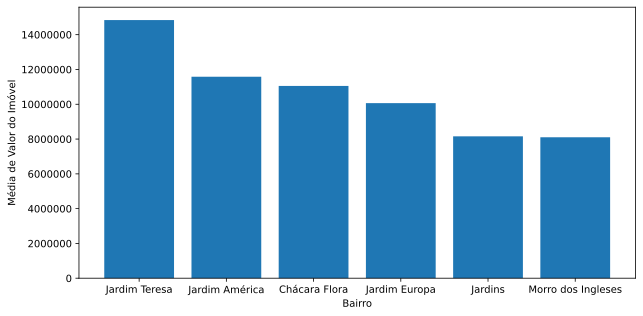

In [12]:
plt.bar( top_6.index,top_6["Valor"])
plt.rcParams["figure.figsize"] = (10, 5)
plt.ylabel("Média de Valor do Imóvel",fontsize=10)
plt.xlabel("Bairro",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(axis="y", style='plain')
plt.show()

Também seria interessante fazer um gráfico de dispersão com a quantidade de quartos e o valor do imóvel. 

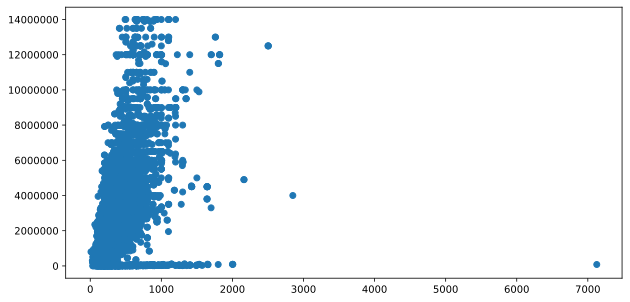

In [13]:
plt.scatter(df["Metragem"], df["Valor"])
plt.ticklabel_format(axis="y", style='plain')

Como há outlier na metragem e nos valores, vou filtrar os dados para se ter um gráfico mais interessante. Usei a estatística Z Score, que define um nível de distância da média dos dados e retirei do dataframe os dados que estão extremamente distantes da média de cada coluna.

In [25]:
from scipy import stats
import numpy as np

df = df[(np.abs(stats.zscore(df["Metragem"])) < 3)]
df = df[(np.abs(stats.zscore(df["Valor"])) < 3)]
df = df[(np.abs(stats.zscore(df["Banheiros"])) < 3)]

Como era esperado, parece haver uma correlação positiva entre o tamanho da residência e o valor, com a linha vermelha representando a reta de regressão dos dados.

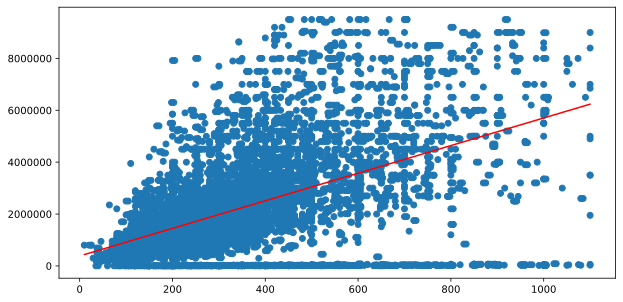

In [15]:
plt.scatter(df["Metragem"], df["Valor"])
plt.ticklabel_format(axis="y", style='plain')
m, b = np.polyfit(df["Metragem"], df["Valor"], 1)
plt.plot(df["Metragem"], m*df["Metragem"]+b, color = "red")


Pode-se fazer um gráfico de dispersão com outras variáveis, além da metragem, como, por exemplo, a quantidade de quartos.

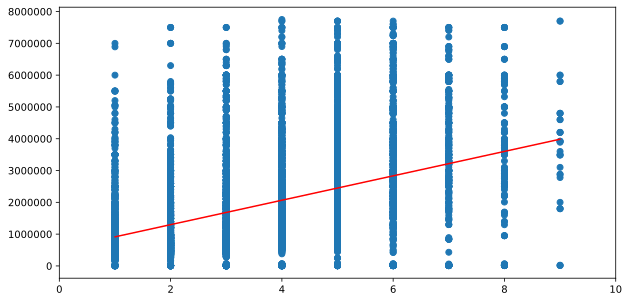

In [29]:
plt.scatter(df["Banheiros"], df["Valor"])
plt.ticklabel_format(axis="y", style='plain')
plt.xlim(0,df["Banheiros"].max()+1)
m, b = np.polyfit(df["Banheiros"], df["Valor"], 1)
plt.plot(df["Banheiros"], m*df["Banheiros"]+b, color = "red")
plt.ylabel[""]

# 4) Outras estatísticas de dados

A mediana de metragem de cada bairro, ou seja, o exato valor do meio do tamanho por bairro.

In [30]:
df.groupby("Bairro")[["Metragem"]].median()

,Metragem
Bairro,
Aclimação,225.0
Alto da Boa Vista,378.0
Alto da Lapa,255.0
Alto da Mooca,182.5
Alto de Pinheiros,400.0
...,...
Vila Água Funda,143.0
Água Branca,174.0
Água Fria,174.5


O valor máximo de imóvel por bairro. Alto do pinheiro tem o imóvel mais caro da amostragem, custando R$ 7.750.000.

In [32]:
df.groupby("Bairro")[["Valor"]].max().sort_values(by = "Valor",ascending = False)

,Valor
Bairro,
Alto de Pinheiros,7750000.0
Jardim Europa,7700000.0
Jardim Guedala,7700000.0
Morumbi,7700000.0
Jardim Paulistano,7500000.0
...,...
Vila Aurea,165000.0
Ibirapuera,45000.0
Vila Noca,4000.0


# 5) Bairros que não tem nome de rua.

Usando a função "isnull()" é simples retirar os bairros que possuem alguma rua sem nome, ou nulo.

In [53]:
df[["Bairro"]][df["Rua"].isnull() == True]

,Bairro
3,Jardim Morumbi
11,Jardim Luzitânia
31,Parque da Lapa
56,Chácara Santo Antônio (Zona Sul)
57,Jardim Guedala
...,...
9955,Vila Formosa
9963,Jardim Petrópolis
9989,Parque Alves de Lima
9991,Vila Formosa
